In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [327]:
# Read the memory log
memory = pd.read_csv('../dpss_memory_log.txt', sep=r'\s+', skiprows=1, header=None)

In [328]:
memory.columns = ['date', 'time', 'level', 'bytes', 'size', 'size_unit']
memory = memory.drop(['size', 'size_unit'], axis=1).set_index(pd.to_datetime(memory['date'] + ' ' + memory['time'])).drop(['date', 'time'], axis=1)

In [329]:
memory.head()

,level,bytes
2020-02-03 18:19:13.913,DEBUG,0
2020-02-03 18:19:14.915,DEBUG,5890048
2020-02-03 18:19:15.916,DEBUG,54697984
2020-02-03 18:19:16.918,DEBUG,106479616
2020-02-03 18:19:17.922,DEBUG,90992640


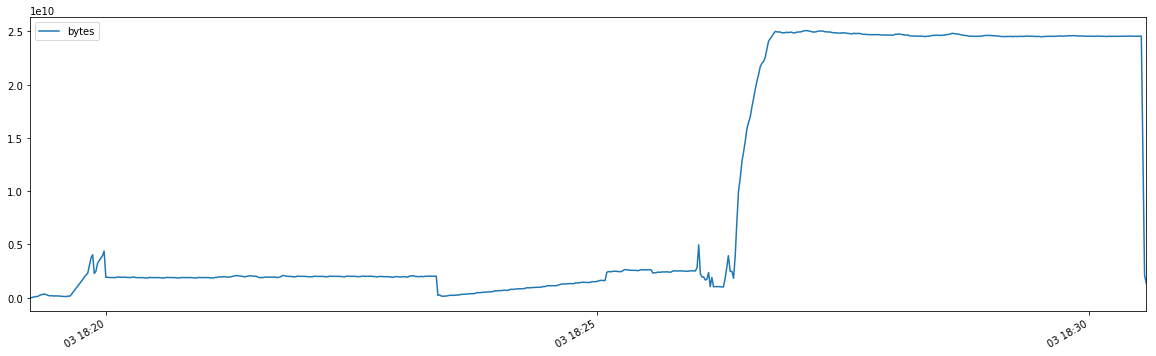

In [330]:
# Plot with time as X-axis
memory.plot(figsize=(20,6))

In [331]:
main_log = pd.read_csv('../dpss_log.txt', sep='\0', header=None, squeeze=True).str.split(' ', n=3, expand=True)
main_log.columns = ['date', 'time', 'level', 'message']
main_log = main_log[main_log['date'].str.match(r'\d{4}-\d{2}-\d{2}')]
main_log = main_log.set_index(pd.to_datetime(main_log['date'] + ' ' + main_log['time'])).drop(['date', 'time'], axis=1)

# drop duplcated time indices
main_log = main_log[~main_log.index.duplicated(keep='first')]
main_log.head()

,level,message
2020-02-03 18:19:13.903,INFO,Generating per-project summary statistics of m...
2020-02-03 18:19:13.904,INFO,Results will be uploaded to the ux-dev project...
2020-02-03 18:19:23.943,INFO,"Found 74 target entities, 0 of which may be bl..."
2020-02-03 18:19:31.980,INFO,Size of 005d611a-14d5-4fbf-846e-571a1f874f70.h...
2020-02-03 18:19:38.356,INFO,Processing matrix.mtx


In [332]:
# Filter entries before/after last memory interval
start, stop = memory.index.min(), memory.index.max()
main_log = main_log[main_log.index.map(lambda dt: start <= dt <= stop)]

In [333]:
indices = [(dt, memory.index.searchsorted(dt)) for dt in main_log.index]
points = {x: memory.iloc[i]['bytes'] for (x, i) in indices}
annotations = {x: main_log.loc[x, 'message'] for x in points}

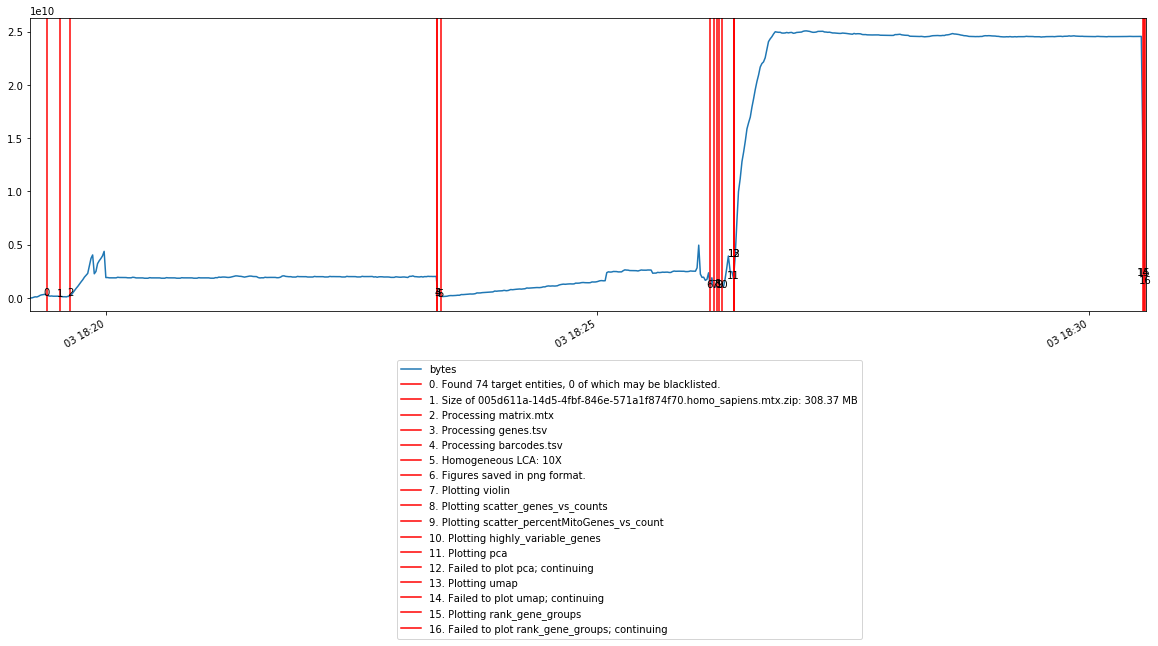

In [335]:
# Add log annotations
memory.plot(figsize=(20,6))
for (i, (x, y)) in enumerate(points.items()):
    plt.plot(x, y, label=f'{i}. {annotations[x]}', c='red')
    plt.axvline(x=x, color='red')
    plt.annotate(xy=(x,y), s=str(i), ha='center')
plt.legend(bbox_to_anchor=(0.75,-0.15))